In [58]:
!pip install nilearn nibabel matplotlib pandas itk itkwidgets

In [59]:
!pip install SimpleITK scikit-image opencv-python Pillow torchvision tensorflow scipy opencv-python-headless

In [60]:
# !pip install --upgrade "nilearn[all]"

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Copying contents of folder

In [62]:
!rsync -av --progress "/content/drive/MyDrive/Training data/" "/content/Training_Data/"

sending incremental file list

sent 9,704 bytes  received 162 bytes  6,577.33 bytes/sec
total size is 1,239,973,683  speedup is 125,681.50


In [63]:
import numpy as mp
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [64]:
# Load the NIfTI file
img_1_3t_F = nib.load('/content/Training_Data/POCEMR001/3T/POCEMR001_FLAIR.nii.gz')
img_1_mt_F = nib.load('/content/Training_Data/POCEMR001/64mT/POCEMR001_FLAIR.nii.gz')

In [65]:
# Get the header
header_1_3t_F = img_1_3t_F.header
header_1_mt_F = img_1_mt_F.header

# Print all header fields (as a dictionary)
print(header_1_3t_F)
print("\n..........................................\n")
print(header_1_mt_F)

# Access specific metadata
# print("Image shape:", header.get_data_shape())   # Dimensions (224, 224, 160))
# print("Voxel sizes (mm):", header.get_zooms())   # Resolution ((1.0, 1.0, 1.0) mm)
# print("Data type:", header.get_data_dtype())     # uint8
# print("Affine matrix:\n", img_1_3t_F.affine)            # Spatial orientation

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 16384
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 224 224 160   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'6.0.5:9e026117')
aux_file        : np.bytes_(b';SIEMENS;d_T2_tse_tra_p3')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.020069938
quatern_c       : -2.4638104e-13
quatern_d       : 2.4439509e

 hot : heatmap (differentiate intensity) -> Brighter means High signal are

 viridis : clearly differentiate snr                                         

 autumn: clearly understand the edges in 3T scans                                  

 Oranges: Better for human eye                                                  

 gray: understand smoothness, hazy in 64mT, clear in 3T                             

In [66]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import logging
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from glob import glob

In [67]:
def load_nifti(file_path):
    """Load a NIfTI image and return as a NumPy array."""
    try:
        img = nib.load(file_path)
        return img.get_fdata()
    except Exception as e:
        logging.error(f"Error loading {file_path}: {e}")
        return None


In [68]:
def calculate_mae(enhanced_img, reference_img):
    """Compute Mean Absolute Error (MAE)."""
    return np.mean(np.abs(enhanced_img - reference_img))


def calculate_nmse(enhanced_img, reference_img):
    """Compute Normalized Mean Squared Error (NMSE)."""
    mse = np.mean((enhanced_img - reference_img) ** 2)
    norm_factor = np.mean(reference_img ** 2)
    return mse / norm_factor if norm_factor > 0 else np.inf


def evaluate_submission(enhanced_img, reference_img):
    """Compute SSIM, PSNR, MAE, and NMSE between enhanced and reference MRI images."""
    # enhanced_img = load_nifti(submission_path)
    # reference_img = load_nifti(reference_path)
    enhanced_img = enhanced_img.get_fdata()
    reference_img = reference_img.get_fdata()

    if enhanced_img is None or reference_img is None:
        return None, None, None, None  # Skip evaluation if loading fails

    # Normalize intensity
    enhanced_img = (enhanced_img - np.min(enhanced_img)) / (np.max(enhanced_img) - np.min(enhanced_img))
    reference_img = (reference_img - np.min(reference_img)) / (np.max(reference_img) - np.min(reference_img))

    # Compute metrics
    ssim_score = ssim(enhanced_img, reference_img, data_range=1.0)
    psnr_score = psnr(reference_img, enhanced_img, data_range=1.0)
    mae_score = calculate_mae(enhanced_img, reference_img)
    nmse_score = calculate_nmse(enhanced_img, reference_img)

    return ssim_score, psnr_score, mae_score, nmse_score


In [69]:
# ssim_score, psnr_score, mae_score, nmse_score = evaluate_submission(img_1_mt_T2, img_1_3t_T2)
# print(ssim_score)
# print(psnr_score)
# print(mae_score)
# print(nmse_score)

In [70]:
# final_score = (
#                 0.7 * ssim_score +
#                 0.1 * psnr_score +
#                 0.1 * (1 - mae_score) +  # Inverted MAE (lower is better)
#                 0.1 * (1 - nmse_score)   # Inverted NMSE (lower is better)
#             )
# print(final_score)

# Function Paremeters

serial: [ *1, 50* ]

scan_type: *3T  64mT*

contrast: *FLAIR   T1   T2*

plane: axial-*xy*    coronal-*zx*    sagittal-*yz*

range: xy-> [ *0, 159* ]  .   zx-> [ *0, 223* ]   .   yz-> [ *0, 223* ]

cmap: *hot   viridis   autumn   Oranges   gray   cool*

In [71]:
patient_no = {i+1: str(val) for i, val in enumerate([
    1, 3, 4, 5, 6, 7, 8, 10, 12, 14, 15, 18, 19, 22, 23, 24, 28, 29, 31, 32,
    33, 35, 38, 39, 43, 49, 54, 56, 61, 62, 64, 65, 67, 73, 74, 79, 80, 82,
    83, 86, 88, 92, 93, 95, 97, 98, 99, 101, 102, 104
])}

def plot_scan_slices(serial, scan_type, contrast, plane, start, end, cmap):
    data = nib.load(f'/content/Training_Data/POCEMR00{patient_no[serial]}/{scan_type}/POCEMR001_{contrast}.nii.gz').get_fdata()
        # raise ValueError("scan_type must be '3t' or 'mt'")

    if start > end:
        raise ValueError("slice_range must be (start, end) where start <= end")

    if plane.lower() == 'xy':
        slices = [data[:, :, z] for z in range(start, end+1)]
        slice_type = "Z"
        view_name = "Axial"
    elif plane.lower() == 'xz':
        slices = [data[:, y, :] for y in range(start, end+1)]
        slice_type = "Y"
        view_name = "Coronal"
    elif plane.lower() == 'yz':
        slices = [data[x, :, :] for x in range(start, end+1)]
        slice_type = "X"
        view_name = "Sagittal"
    else:
        raise ValueError("Plane must be 'xy', 'xz', or 'yz'")

    num_slices = end - start + 1
    max_per_row = 8
    num_rows = (num_slices + max_per_row - 1) // max_per_row  # Ceiling division


    fig = plt.figure(figsize=(14, 2 * num_rows + 1))
    fig.suptitle(f'{scan_type.upper()} {contrast} Scan - {view_name} View ({slice_type}-slices {start}-{end})',
                 fontsize=14, y=0.98)

    # Plot slices in grid format
    for i in range(num_slices):
        ax = fig.add_subplot(num_rows, max_per_row, i+1)
        ax.imshow(slices[i], cmap=cmap)
        ax.axis('off')
        ax.set_title(f"Slice {start+i}", fontsize=9)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for title space

    plt.show()


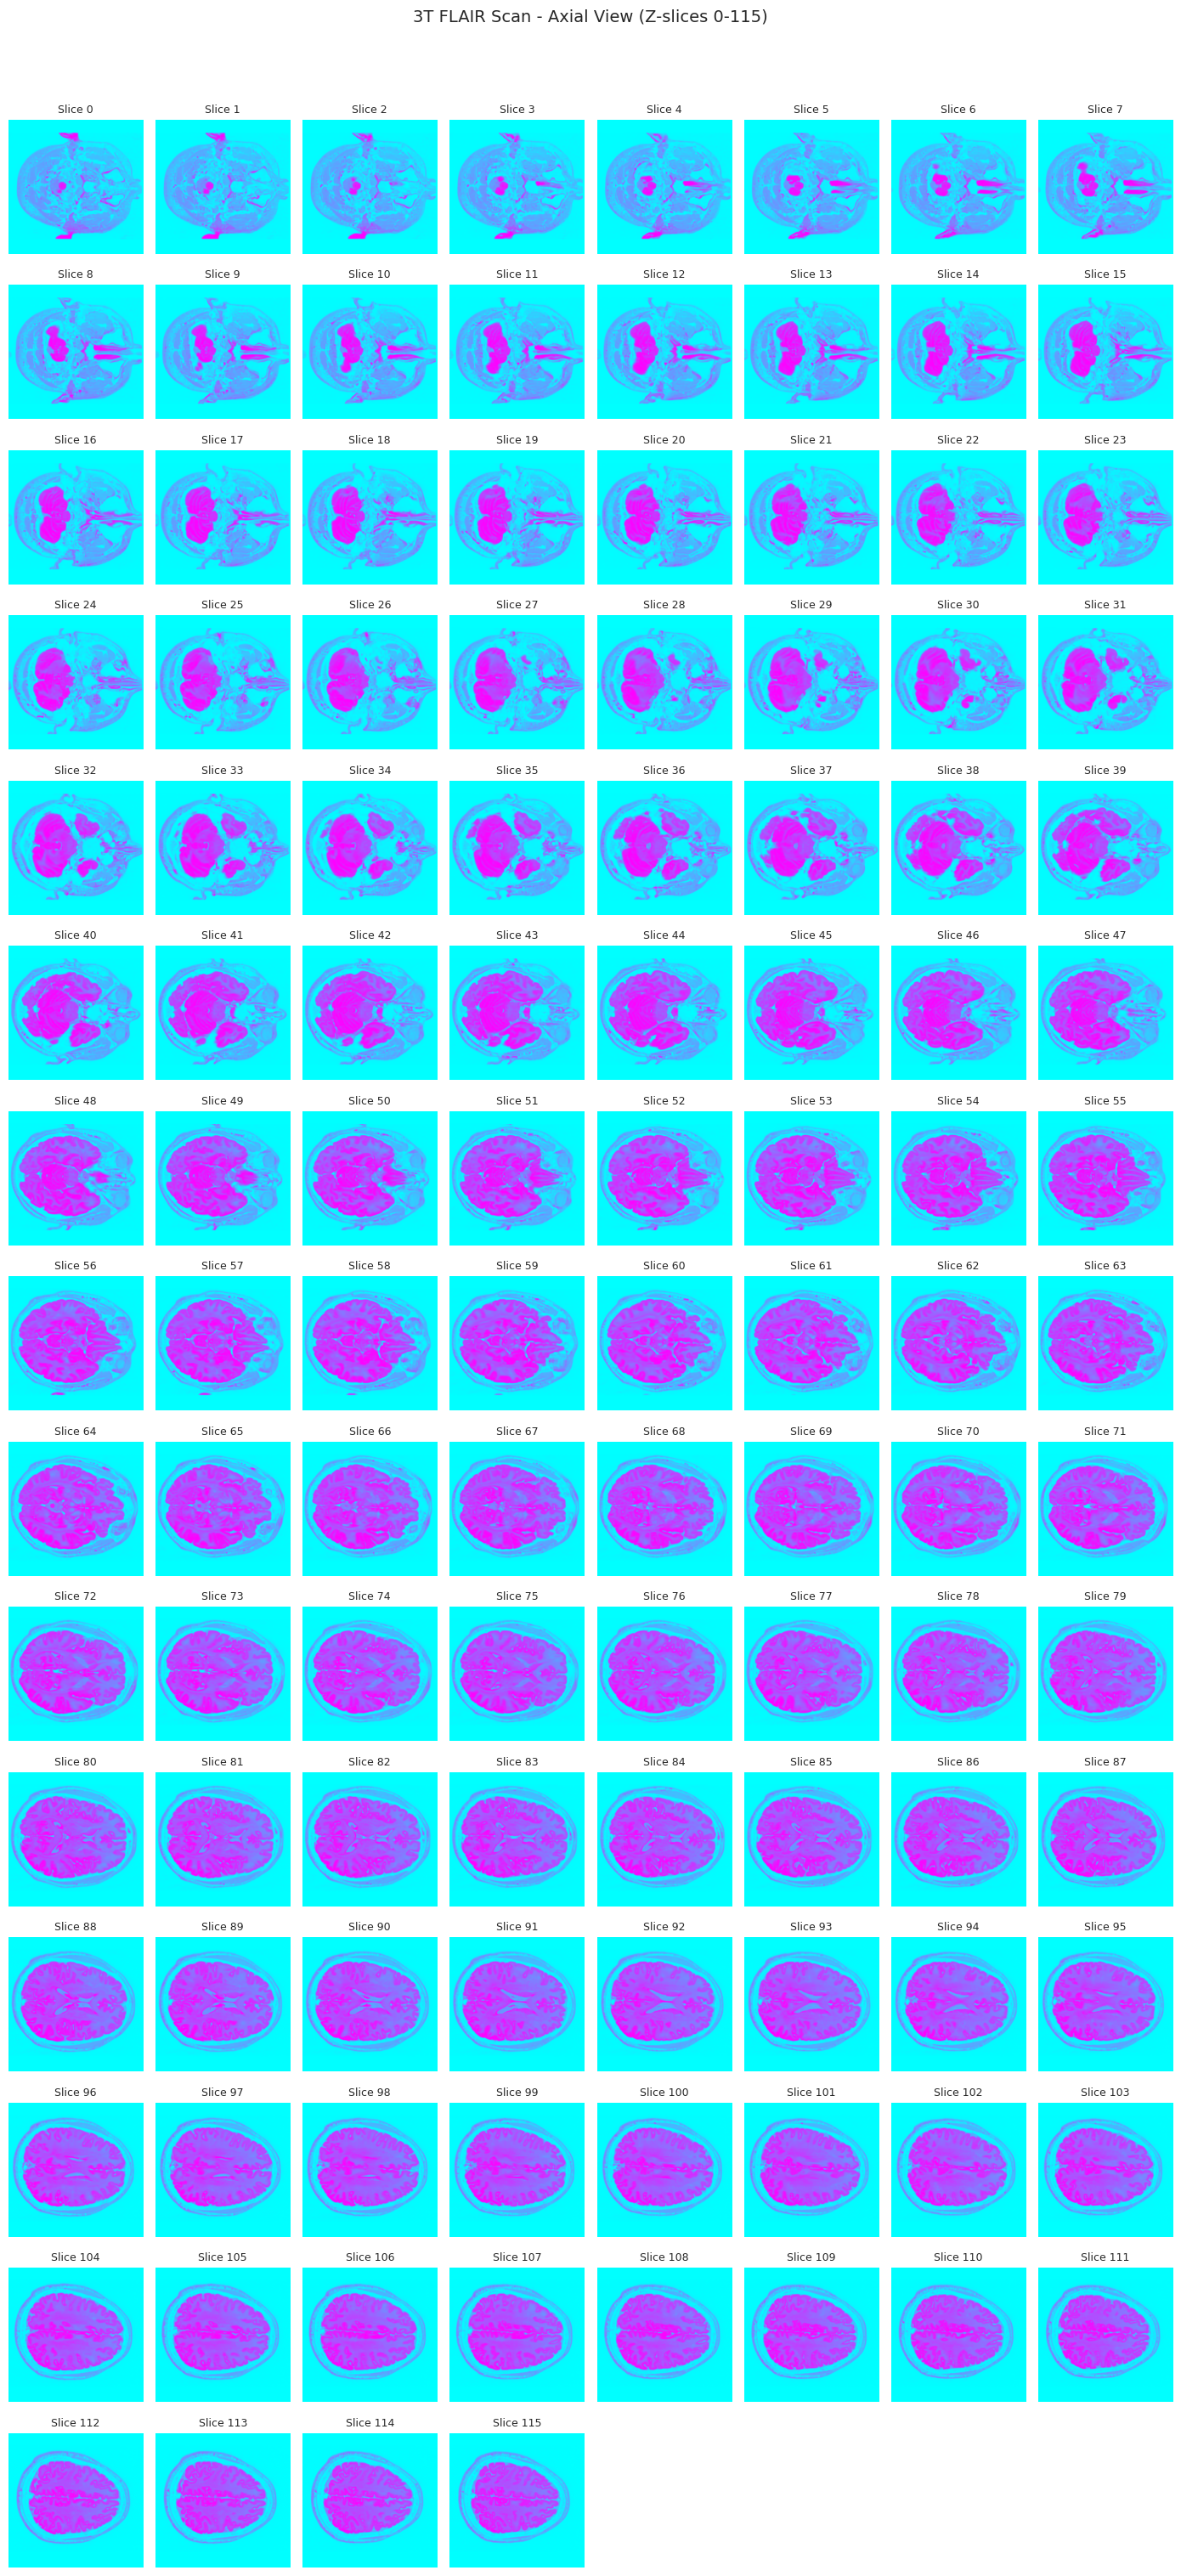

In [72]:
plot_scan_slices(1, "3T", "FLAIR", "xy", 0, 115, "cool")